In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Algoritmo Naïve Bayes

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

In [2]:
# Carregamento da base de dados e definição dos previsores (variáveis independentes - X) e a classe (variável dependente - y)
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [3]:
# Formato de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [4]:
array1 = np.array(['abacaxi', 'melancia', 'abacaxi', 'melão','couve','abacaxi','couve'])
labelenc = LabelEncoder()
array1 = labelenc.fit_transform(array1)
array1

array([0, 2, 0, 3, 1, 0, 1])

In [5]:
selected = [0,2,3,5,6,8,9,11,13,14,16,18,19]

for i in selected:
    previsores[:, i] = LabelEncoder().fit_transform(previsores[:,i])
    print(previsores[:,i])

[2 1 0 2 2 0 0 1 0 1 1 2 1 2 2 2 0 2 1 0 0 2 2 1 0 2 0 3 1 2 1 2 1 0 3 1 0
 3 3 1 0 1 1 2 2 0 0 2 0 0 1 1 0 0 1 0 1 0 3 2 1 1 1 1 0 0 0 1 0 0 0 0 2 1
 2 2 2 1 0 1 0 0 0 2 2 0 1 1 2 2 0 2 0 3 1 1 0 1 1 1 0 1 0 1 0 1 0 1 2 1 1
 3 1 0 2 0 2 2 2 1 2 0 0 3 1 2 2 1 1 2 1 2 0 0 0 0 0 1 1 3 3 1 2 2 0 1 2 0
 2 0 0 0 3 1 1 2 2 2 1 0 0 0 0 1 0 0 2 1 0 1 2 0 1 1 2 0 2 2 0 2 0 1 2 0 1
 0 1 1 2 1 0 1 1 0 1 1 0 1 1 1 0 2 0 2 0 2 0 1 2 0 0 0 2 3 0 1 2 3 2 0 1 2
 0 0 0 0 1 2 0 2 3 0 0 1 0 2 1 1 0 2 2 0 2 0 0 0 0 0 3 0 2 3 1 0 1 1 0 2 0
 0 2 2 2 0 0 1 0 0 2 0 0 0 1 1 2 0 0 2 0 0 0 0 3 0 1 2 2 1 1 2 0 1 2 3 0 1
 0 0 0 1 0 1 3 2 0 0 0 2 1 1 1 0 3 1 3 2 2 1 0 2 1 2 2 2 0 2 0 0 3 1 2 0 1
 0 2 2 1 2 2 1 1 2 1 1 3 0 1 1 0 1 0 1 0 2 0 1 0 0 0 2 1 3 3 0 2 0 0 2 2 1
 0 0 0 0 1 2 0 0 1 0 2 1 0 3 0 0 0 1 1 0 0 1 2 2 0 1 2 2 1 0 0 1 0 0 1 1 0
 2 0 3 1 0 0 0 2 0 2 2 0 1 0 1 1 0 1 1 0 0 0 2 0 1 2 0 2 1 0 0 2 3 0 2 1 0
 1 0 2 1 3 1 0 0 0 0 2 0 2 2 2 0 2 2 1 1 0 2 2 0 0 0 1 2 2 0 1 2 0 3 1 2 1
 1 2 0 0 1 0 0 0 0 0 1 0 

In [37]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)


array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'goo

In [40]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [41]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [42]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [43]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

/home/gabriel/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


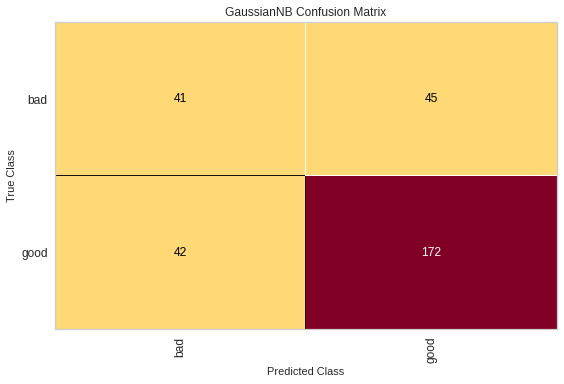

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [45]:
# Previsão com novo registro, transformando os atributos categóricos em numéricos
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape
#novo_credito

(1, 20)

In [ ]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente o método "transform", pois a adaptação aos dados (fit) já foi feita anteriormente
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

In [ ]:
# Resultado da previsão
naive_bayes.predict(novo_credito)